# WeatherPy
----

### Analysis
* As we predicted, it is warmer in cities closer to the equator. Currently, cities in the far Northern Hemisphere are colder on average than those in the far Southern Hemisphere
* There does not seem to be strong relationships between latitude and cloudiness or humidity. There are many cities that have zero percent cloudiness and also many cities that have 100 percent humidity. 
* Wind speeds do not seem to be related to latitude, but there is a band in the northern hemisphere (between 60 and 80 degrees) that has higher winds than anywhere else. In some cities in this band the wind speed exceeds 35 mph.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cloud = []
country = []
date = []
humid = []
lat = []
lon = []
mtemp = []
wind = []

for index, city in enumerate(cities):
    query_url = url + "appid=" + api_key + "&units=imperial&q=" + city
    try:
        response = requests.get(query_url).json()
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        mtemp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        print(f"Processing record number {index+1}, {city}!")
    except KeyError:
        cloud.append(0)
        country.append(0)
        date.append(0)
        humid.append(0)
        lat.append(0)
        lon.append(0)
        mtemp.append(0)
        wind.append(0)
        print(f"Couldn't find {city}. Skipping...")
        

Couldn't find qurayyat. Skipping...
Processing record number 2, qaanaaq!
Processing record number 3, bluff!
Processing record number 4, port blair!
Processing record number 5, paamiut!
Processing record number 6, new norfolk!
Processing record number 7, omboue!
Processing record number 8, mataura!
Processing record number 9, ushuaia!
Processing record number 10, carutapera!
Processing record number 11, hobart!
Processing record number 12, punta arenas!
Processing record number 13, bonavista!
Processing record number 14, mount pleasant!
Processing record number 15, kapaa!
Processing record number 16, dikson!
Processing record number 17, avarua!
Processing record number 18, vuktyl!
Processing record number 19, puerto ayora!
Processing record number 20, carroll!
Processing record number 21, khorinsk!
Processing record number 22, puerto madryn!
Processing record number 23, phek!
Processing record number 24, thompson!
Processing record number 25, okato!
Processing record number 26, ribeira 

Processing record number 208, selaphum!
Processing record number 209, villa carlos paz!
Processing record number 210, beringovskiy!
Processing record number 211, ponferrada!
Processing record number 212, okhotsk!
Processing record number 213, goure!
Processing record number 214, san patricio!
Couldn't find olafsvik. Skipping...
Processing record number 216, wanaka!
Couldn't find marcona. Skipping...
Processing record number 218, quelimane!
Processing record number 219, lompoc!
Processing record number 220, lumphat!
Processing record number 221, borskoye!
Processing record number 222, ust-tsilma!
Processing record number 223, necochea!
Processing record number 224, cherskiy!
Processing record number 225, auki!
Processing record number 226, merta!
Processing record number 227, bilma!
Processing record number 228, mehamn!
Processing record number 229, ruy barbosa!
Couldn't find fevralsk. Skipping...
Processing record number 231, georgetown!
Processing record number 232, caconda!
Processin

Processing record number 416, basco!
Processing record number 417, rudnogorsk!
Processing record number 418, quatre cocos!
Processing record number 419, anloga!
Processing record number 420, bosaso!
Processing record number 421, grimshaw!
Processing record number 422, lodja!
Couldn't find krasnoselkup. Skipping...
Processing record number 424, troitsko-pechorsk!
Couldn't find kazalinsk. Skipping...
Processing record number 426, saint-augustin!
Processing record number 427, narsaq!
Processing record number 428, lincoln!
Processing record number 429, bocas del toro!
Processing record number 430, nogliki!
Processing record number 431, chumikan!
Processing record number 432, daryapur!
Processing record number 433, aliwal north!
Processing record number 434, mahebourg!
Processing record number 435, kudahuvadhoo!
Processing record number 436, micheweni!
Couldn't find taburi. Skipping...
Processing record number 438, port maria!
Processing record number 439, lavrentiya!
Couldn't find kuche. S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_dict = {
   "City": cities,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": mtemp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.drop(weather_data[weather_data.Country == 0].index, inplace=True)
weather_data.drop(weather_data[weather_data.Humidity > 100].index, inplace=True)
weather_data.to_csv(output_data_file, index=False, header=True)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
1,qaanaaq,0,GL,03/26/19,72,77.48,-69.36,-11.59,9.75
2,bluff,80,AU,03/26/19,78,-23.58,149.07,75.99,7.52
3,port blair,80,IN,03/26/19,100,11.67,92.75,80.49,6.06
4,paamiut,44,GL,03/26/19,100,61.99,-49.67,22.71,3.83
5,new norfolk,0,AU,03/26/19,70,-42.78,147.06,48.20,6.93


#### Latitude vs. Temperature Plot

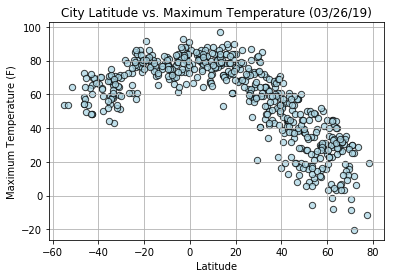

In [26]:
date = time.strftime("%x")
plt.scatter(weather_data['Latitude'], weather_data['Max Temp'], marker="o", facecolors="lightblue", edgecolors="black",
            s=40, alpha=0.75)
plt.grid()
title = "City Latitude vs. Maximum Temperature ({})".format(date)
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Humidity Plot

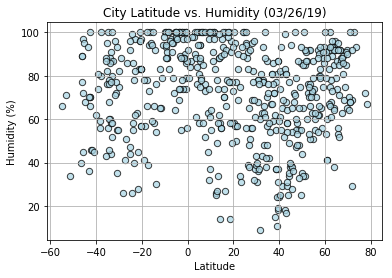

In [22]:
date = time.strftime("%x")
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], marker="o", facecolors="lightblue", edgecolors="black",
            s=40, alpha=0.75)
plt.grid()
title = "City Latitude vs. Humidity ({})".format(date)
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

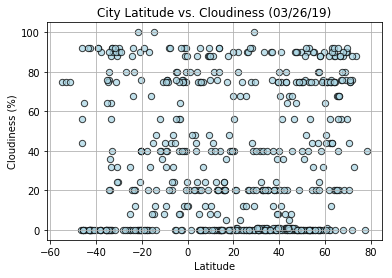

In [23]:
date = time.strftime("%x")
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'], marker="o", facecolors="lightblue", edgecolors="black",
            s=40, alpha=0.75)
plt.grid()
title = "City Latitude vs. Cloudiness ({})".format(date)
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

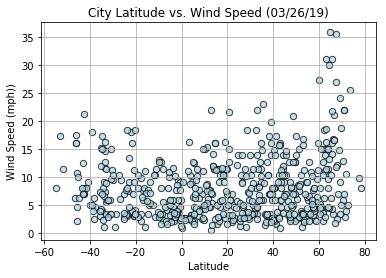

In [24]:
date = time.strftime("%x")
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], marker="o", facecolors="lightblue", edgecolors="black",
            s=40, alpha=0.75)
plt.grid()
title = "City Latitude vs. Wind Speed ({})".format(date)
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.savefig("lat_vs_wind.png")